**RNN CON LSTM**

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime
import keras

# 1. Importar los datos

In [2]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


# 2. Preprocesamiento

In [3]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [4]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [5]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


Reemplazar datos faltantes

In [6]:
df = df.fillna(df.mean())

In [7]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [8]:
df.shape

(8637, 14)

## 1.2 Normalizar los datos

In [9]:
dataset = df.values # Convertir a numpy array

In [10]:
training_data_len = int(np.ceil(len(dataset) * 0.95))  # 95% data para entrenamiento y validación
test_data_len = len(dataset) - training_data_len  # 5% data para test

In [11]:
dataset[:,12] # Aportes

array([43.51 , 43.67 , 41.21 , ..., 32.565, 28.913, 26.057])

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

## 1.3 Separar los datos de entrenamiento y validación

In [13]:
predicted_days = len(scaled_data) - training_data_len
predicted_days

431

In [14]:
train_val_data = scaled_data[:training_data_len]

In [15]:
val_data_len = int(np.ceil(len(train_val_data) * 0.1))  # 10% de los datos de entrenamiento+validación para validación
training_data = train_val_data[:-val_data_len]
val_data = train_val_data[-val_data_len:]

In [16]:
print(f"Total de datos de entrenamiento: {len(training_data)}")
print(f"Total de datos de validación: {len(val_data)}")

Total de datos de entrenamiento: 7385
Total de datos de validación: 821


In [17]:
training_data.shape

(7385, 14)

## 1.3 Crear ventana de tiempo

Datos de entrenamiento

In [18]:
X_train, y_train = [], []

window_slide = 30 # 30 días

for i in range(window_slide, len(training_data)):
    X_train.append(training_data[i-window_slide:i,:]) # Todas las variables
    y_train.append(training_data[i,12]) # Aportes
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 14))

In [19]:
X_train.shape

(7355, 30, 14)

In [20]:
y_train.shape

(7355,)

Datos de validación

In [21]:
X_val, y_val = [], []
for i in range(len(training_data), len(train_val_data)):
    X_val.append(train_val_data[i-window_slide:i, :])  # Todas la variables
    y_val.append(train_val_data[i, 12])  # Aportes

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 14))

# 3. Construir el modelo

In [22]:
from keras import regularizers

# Definir modelo
model = keras.models.Sequential()

# Añadir capas LSTM
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],14), kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))

# Añadir capas densas
model.add(keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

In [24]:
model.compile(optimizer=optimizer,
              loss="mae",
              metrics=[keras.metrics.R2Score()])

# 4. Entrenar

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [ ]:
training = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=40, 
                    batch_size=64, 
                    callbacks=[early_stopping, lr_scheduler])

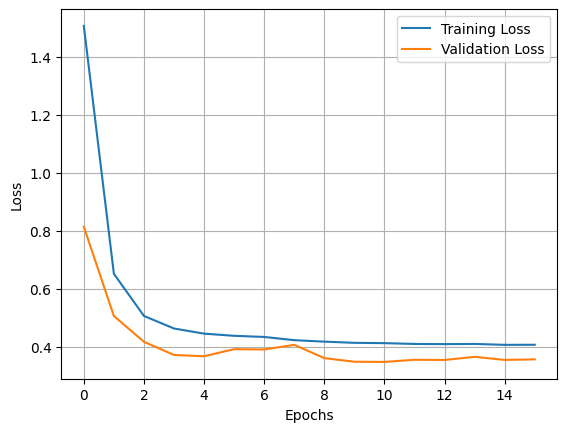

In [27]:
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 5. Resultados

In [28]:
# Preparar los datos de test
test_data = scaled_data[training_data_len-window_slide:]
X_test, y_test = [], dataset[training_data_len:,12]

for i in range(window_slide, len(test_data)):
    X_test.append(test_data[i-window_slide:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],14))

In [29]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [30]:
predictions.shape

(431, 1)

In [31]:
predictions = np.repeat(predictions, 14, axis=1)
predictions_final = scaler.inverse_transform(predictions)

In [32]:
train = df[['AporCaudal']][:training_data_len]
test =  df[['AporCaudal']][training_data_len:]

In [33]:
predictions = predictions_final[:, 12] 

In [34]:
predictions = pd.DataFrame(predictions, index=test.index, columns=["Predictions"])


In [35]:
predictions.head(1)

,Predictions
Date,
2022-06-27,96.611794


In [36]:
test.head(1)

,AporCaudal
Date,
2022-06-27,128.342


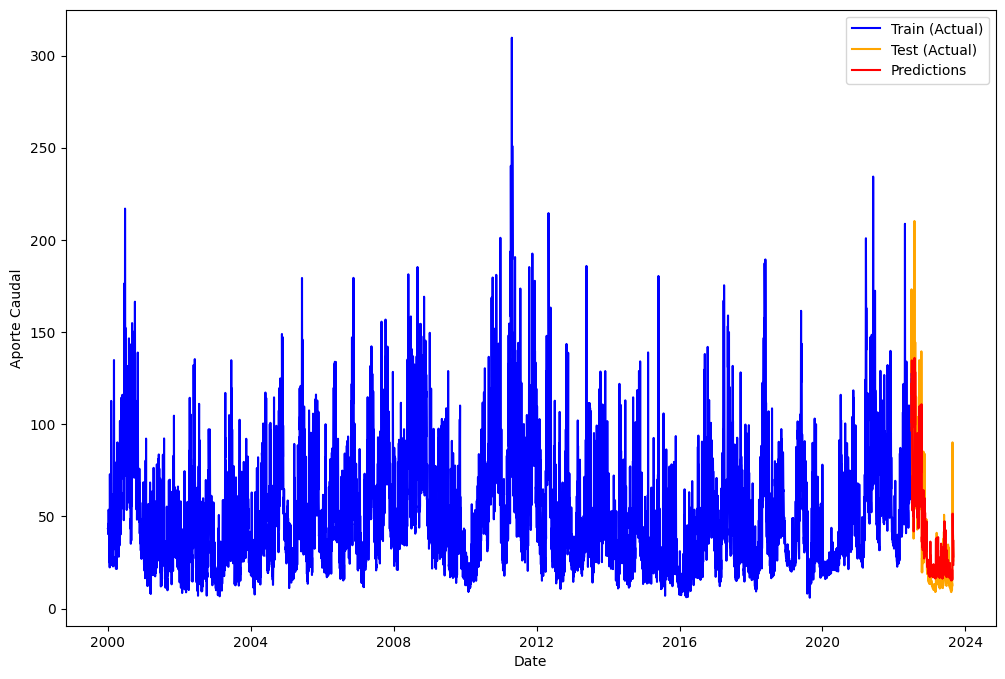

In [37]:
plt.figure(figsize=(12,8))
plt.plot(train, label="Train (Actual)", color='blue')
plt.plot(test, label="Test (Actual)", color='orange')
plt.plot(predictions, label="Predictions", color='red')
plt.xlabel("Date")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()

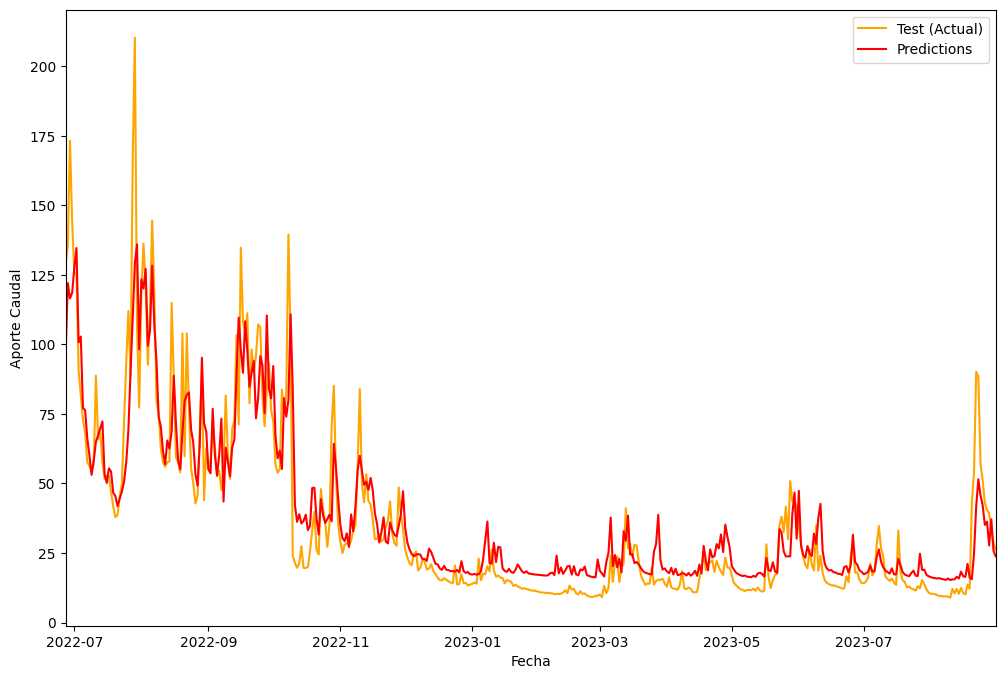

In [38]:
import matplotlib.pyplot as plt

# Definir el periodo de las predicciones
start_date = predictions.index.min()  # Primer día de las predicciones
end_date = predictions.index.max()    # Último día de las predicciones

plt.figure(figsize=(12,8))

# Graficar datos de prueba
plt.plot(test, label="Test (Actual)", color='orange')

# Graficar predicciones
plt.plot(predictions.index, predictions, label="Predictions", color='red')

# Ajustar el rango de fechas (zoom en el periodo de las predicciones)
plt.xlim(start_date, end_date)

plt.xlabel("Fecha")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from math import sqrt

# Calcular MSE, MAE, RMSE y R²
mse = mean_squared_error(test['AporCaudal'], predictions['Predictions'])
mae = mean_absolute_error(test['AporCaudal'], predictions['Predictions'])
rmse = sqrt(mse)
r2 = r2_score(test['AporCaudal'], predictions['Predictions'])

# Crear un DataFrame para mostrar las métricas
metrics = {
    'Metric': ['MSE', 'MAE', 'RMSE', 'R²'],
    'Value': [mse, mae, rmse, r2]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla con las métricas
metrics_df

,Metric,Value
0,MSE,159.059564
1,MAE,8.372066
2,RMSE,12.611882
3,R²,0.850223
